In [1]:
#导入狗数据集
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# 定义函数来加载train，test和validation数据集
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# 加载train，test和validation数据集
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# 加载狗品种列表
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# 打印数据统计描述
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [2]:
#导入人脸数据集
import random
random.seed(8675309)

# 加载打乱后的人脸数据集的文件名
human_files = np.array(glob("lfw/lfw/*/*"))
random.shuffle(human_files)

# 打印数据集的统计描述
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


Number of faces detected: 1


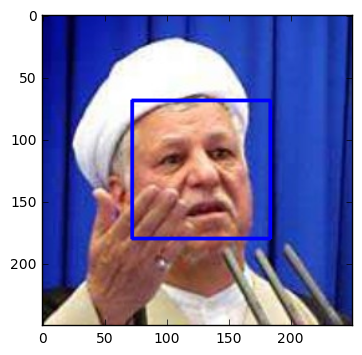

In [3]:
#利用opencv检测人脸
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt                        
%matplotlib inline                    

# 提取预训练的人脸检测模型
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# 加载彩色（通道顺序为BGR）图像
img = cv2.imread(human_files[3])
# 将BGR图像进行灰度化处理
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 在图像中找出脸
faces = face_cascade.detectMultiScale(gray)

# 打印图像中检测到的脸的个数
print('Number of faces detected:', len(faces))

# 获取每一个所检测到的脸的识别框
for (x,y,w,h) in faces:
    # 将识别框添加到彩色图像中
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# 将BGR图像转变为RGB图像以打印
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 展示含有识别框的图像
plt.imshow(cv_rgb)
plt.show()

In [4]:
#人脸识别器
# 如果img_path路径表示的图像检测到了脸，返回"True" 
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [16]:
#评估人脸检测模型
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# 请不要修改上方代码
human_num = 0
dog_num = 0
#测试face_detector的表现
for i in range(0,100)  :
    human_path = human_files_short[i]
    human_detector = face_detector(human_path)
    if human_detector == True:
        human_num +=1
print('human face detetor :', human_num/100)

for i in range(0,100)  :
    dog_path = dog_files_short [i]
    dog_detector = face_detector(dog_path)
    if dog_detector == True:
        dog_num+=1
print('dog face detetor :', dog_num/100)
## 通过human_files_short和dog_files_short中的图像


human face detetor : 0.99
dog face detetor : 0.12


In [21]:
#使用ResNet50检测狗
from keras.applications.resnet50 import ResNet50

# 定义ResNet50模型
ResNet50_model = ResNet50(weights='imagenet')

In [22]:
#数据预处理
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # 加载RGB图像为PIL.Image.Image类型
    img = image.load_img(img_path, target_size=(224, 224))
    # 将PIL.Image.Image类型转化为格式为(224, 224, 3)的3维张量
    x = image.img_to_array(img)
    # 将3维张量转化为格式为(1, 224, 224, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [23]:
#使用ResNet-50做预测
from keras.applications.resnet50 import preprocess_input, decode_predictions
def ResNet50_predict_labels(img_path):
    # 返回img_path路径的图像的预测向量
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [24]:
#完成狗检测模型
#如果img_path中的图像可以检测到狗，就返回True" 
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__问题 3:__ 使用下方代码单元来测试你所完成的`dog_detector`函数的表现力。
- `human_files_short`中图像检测到狗的百分比？
- `dog_files_short`中图像检测到狗的百分比？

__回答:__ 
- `human_files_short`中图像检测到狗的百分比为0%
- `dog_files_short`中图像检测到狗的百分比99%


In [47]:
### TODO: 测试dog_detector函数在human_files_short和dog_files_short的表现
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
human_num = 0
dog_num = 0
for i in range(0,100)  :
    human_path = human_files_short[i]
    human_detector = dog_detector(human_path)
    if human_detector == True:
        human_num +=1
print('dog face detetor in human_files_short :', human_num/100)

for i in range(100)  :
    
    dog_detector(train_files[i])
    if dog_detector(train_files[i]) == True:
        dog_num+=1
print('dog face detetor in dog_files_short :', dog_num/100)

dog face detetor in human_files_short : 0.0
dog face detetor in dog_files_short : 0.99


In [5]:
#创建一个CNN来分类狗品种
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# Keras中的数据预处理过程
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:06<00:00, 123.43it/s]


In [6]:
#模型架构
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

#定义架构
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D(data_format=None))
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [23]:
#编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#训练模型
from keras.callbacks import ModelCheckpoint  

epochs = 30

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/30
6680/6680 [==============================] - 33s - loss: 4.8769 - acc: 0.0115 - val_loss: 4.8611 - val_acc: 0.0120
Epoch 2/30
6680/6680 [==============================] - 33s - loss: 4.8429 - acc: 0.0130 - val_loss: 4.8320 - val_acc: 0.0168
Epoch 3/30
6680/6680 [==============================] - 33s - loss: 4.8041 - acc: 0.0189 - val_loss: 4.8092 - val_acc: 0.0251
Epoch 4/30
6680/6680 [==============================] - 33s - loss: 4.7755 - acc: 0.0193 - val_loss: 4.7850 - val_acc: 0.0240
Epoch 5/30
6680/6680 [==============================] - 33s - loss: 4.7460 - acc: 0.0247 - val_loss: 4.7673 - val_acc: 0.0204
Epoch 6/30
6680/6680 [==============================] - 33s - loss: 4.7190 - acc: 0.0272 - val_loss: 4.7569 - val_acc: 0.0299
Epoch 7/30
6680/6680 [==============================] - 33s - loss: 4.6899 - acc: 0.0304 - val_loss: 4.7221 - val_acc: 0.0240
Epoch 8/30
6680/6680 [==============================] - 33s - loss: 4.6

In [13]:
#加载具有最好验证loss的模型
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [27]:
#测试模型
# 获取测试数据集中每一个图像所预测的狗品种的index
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# 报告测试准确率
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 6.4593%


In [7]:
#使用迁移学习来对狗进行分类
#从另一个预训练的CNN获取bottleneck特征
bottleneck_features = np.load('DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

In [8]:
#Resnet50作为特征提取器进行迁移学习
#定义你的框架

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model.add(Dense(133, activation='softmax'))

Resnet50_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [18]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
#训练模型
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5',
                             verbose = 1, save_best_only = True)
Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=10, batch_size=20, callbacks=[checkpoint], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/10
6680/6680 [==============================] - 1s - loss: 0.0045 - acc: 0.9987 - val_loss: 1.2811 - val_acc: 0.8228
Epoch 2/10
6680/6680 [==============================] - 1s - loss: 0.0043 - acc: 0.9988 - val_loss: 1.3004 - val_acc: 0.8216
Epoch 3/10
6680/6680 [==============================] - 1s - loss: 0.0059 - acc: 0.9990 - val_loss: 1.2985 - val_acc: 0.8192
Epoch 4/10
6680/6680 [==============================] - 1s - loss: 0.0036 - acc: 0.9988 - val_loss: 1.2961 - val_acc: 0.8192
Epoch 5/10
6680/6680 [==============================] - 1s - loss: 0.0054 - acc: 0.9988 - val_loss: 1.2906 - val_acc: 0.8156
Epoch 6/10
6680/6680 [==============================] - 1s - loss: 0.0047 - acc: 0.9985 - val_loss: 1.2934 - val_acc: 0.8192
Epoch 7/10
6680/6680 [==============================] - 1s - loss: 0.0048 - acc: 0.9987 - val_loss: 1.2884 - val_acc: 0.8180
Epoch 8/10
6680/6680 [==============================] - 1s - loss: 0.0044 - ac

In [9]:
#加载具有最佳验证loss的模型权重
Resnet50_model.load_weights('saved_models/weights.best.Resnet50.hdf5')

In [10]:
#在测试集上计算分类准确率
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# 报告测试准确率
test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.6986%


In [14]:
#预测狗的品种
from extract_bottleneck_features import *
def Resnet50_predict_breed(img_path):
    Resnet50_predict = extract_Resnet50(path_to_tensor(img_path))
    
    predict = Resnet50_model.predict(Resnet50_predict)
    
    return(dog_names[np.argmax(predict)])

In [15]:
Resnet50_predict_breed(train_files[0])

'Kuvasz'

In [27]:
#对任意图像分类
def predict_breed(img_path):
    
    breed = Resnet50_predict_breed(img_path)
    
    if face_detector(img_path) == True:
        print('Human, you look like a ' + str(breed))
    elif dog_detector(img_path):
        print('This is a ' + str(breed))
    else:
        print('There are no dog and human')
    
    
    

In [28]:
sample_files = np.array(glob('samples/*'))
for i in range(6):
    print(predict_breed(sample_files[i]))

This is a Golden_retriever
None
Human, you look like a Maltese
None
This is a French_bulldog
None
This is a Alaskan_malamute
None
There are no dog and human
None
This is a Alaskan_malamute
None
